# Before Running
Add files health.txt, bags.csv and word2vec.csv to the health-dataset folder.

# Introduction
Here, we'll explore k-means clustering algorithm applied to health news in twitter.

In [15]:
import csv
import io
from kmedoids import kMedoids
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import normalize


In [16]:
def load_health_data():
    return pd.read_csv('health-dataset/health.txt', sep='|')
def load_word2vec_data():
    return pd.read_csv('health-dataset/word2vec.csv', header=None)
def load_bags_data():
    return pd.read_csv('health-dataset/bags.csv', header=None)

First, we load our data and set the amount of clusters for K-means clustering:

In [17]:
word2vec_health_df = load_word2vec_data()
bags_health_df = load_bags_data()
clusters_amount=100

# First attempt at word2vec
First we'll get the results using the given word2vec.
Using KMeans we have:

In [13]:
print ("clusters", ',', "silhouette_score", ',', "sse", sep='')
for i in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1250,1500,1750,2000]:
    kmeans = KMeans(n_clusters=i).fit(word2vec_health_df)
    labels = kmeans.labels_
    y = silhouette_score(word2vec_health_df, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')
       

clusters,silhouette_score,sse
2,0.039663187165203076,1738.5807785531524
3,-0.003935622287668444,1713.9772459126323
4,-0.002250954081405711,1694.09351578021
5,0.00123523886357727,1678.0414043648116
6,0.0032229778096967737,1664.6149341060686
7,0.0038022674476372803,1650.5920517821428
8,-0.009179920961126879,1639.360375037258
9,-0.003945454524917425,1629.2400533737043
10,0.0007885503443092437,1619.3429238279034
15,-0.01579030252481243,1579.816586468366
20,-0.013548960048093682,1554.353030121998
25,-0.011738464725890074,1537.770426969449
30,-0.01016007254626613,1519.316913734207
35,-0.008457799045483088,1505.2962623248982
40,-0.011944234763506218,1495.5619691092202
45,-0.014338423055615578,1485.4161636732224
50,-0.011489690382464404,1476.4385881765368
60,-0.008528625675577599,1458.1925269528697
70,-0.014953487309328313,1442.349370491218
80,-0.011083508199577638,1429.053055630398
90,-0.015905783400838567,1418.302466289106
100,-0.013108338911474685,1406.7207873631216
150,-0.01297992386623997

# First attempt at bags
Apply the same logic to bags

In [14]:
print ("clusters", ',', "silhouette_score", ',', "sse", sep='')
for i in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1250,1500,1750,2000]:
    kmeans = KMeans(n_clusters=i).fit(bags_health_df)
    labels = kmeans.labels_
    y = silhouette_score(bags_health_df, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')
       

clusters,silhouette_score,sse
2,0.008991481658552134,12857.98820935611
3,0.011302770689326178,12788.65165308581
4,0.012392148415860763,12708.652257492102
5,0.01416509438709467,12649.41038117425
6,0.01661556863527541,12579.66127788025
7,0.016693676174826356,12544.076890899018
8,0.01843291600950271,12484.09088249832
9,0.020118514919956972,12424.939901826949
10,0.021322955252054465,12381.322662417235
15,0.027242796733129838,12163.730571847647
20,0.0274711646657451,12066.289971098064
25,0.0326365999560259,11859.178658582081
30,0.03745260735196195,11719.35448430012
35,0.037181852073967396,11654.274478335648
40,0.04128713581318155,11534.357875374879
45,0.031646112255366655,11686.101743917412
50,0.04248146150868991,11382.728262267428
60,0.047318430206087364,11185.936243830798
70,0.05087331375566489,11007.673082502355
80,0.054126490370710864,10845.688804590089
90,0.0397269103674144,10945.44849086199
100,0.04258714638097825,10855.190386080496
150,0.05951871753675102,10260.603543685309
200,0.062

# Now normalizing our input:
Repeating the previous procedure for word2vec and bags, after normalizing the input.

In [18]:
word2vec_health_df_normalized = normalize(word2vec_health_df)
bags_health_df_normalized = normalize(bags_health_df)

In [16]:
print ("clusters", ',', "silhouette_score", ',', "sse", sep='')
for i in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1250,1500,1750,2000]:
    kmeans = KMeans(n_clusters=i).fit(word2vec_health_df_normalized)
    labels = kmeans.labels_
    y = silhouette_score(word2vec_health_df_normalized, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')
       

clusters,silhouette_score,sse
2,0.03729260481556011,5937.4149774241705
3,0.00207262717114272,5848.768448737251
4,0.004639893910689523,5783.223305249412
5,0.00722596971897188,5726.083319229869
6,0.009479414801961208,5675.1167450379435
7,0.01097708837293145,5632.207931868449
8,0.00023068153513698022,5590.375544639108
9,0.0014027681967357214,5554.744152104719
10,-0.008594672129124854,5523.38772771932
15,-8.222594750008752e-05,5388.033922721864
20,0.0052074569476472125,5309.933998506853
25,0.0040069271485976225,5242.869389108583
30,0.0013464437641970428,5189.51098145294
35,0.0031556679266498333,5133.117916354836
40,0.004027493677789151,5102.543927232622
45,0.0014607417266853525,5056.354599543818
50,0.00047720391136497035,5024.066107930559
60,0.003677499135260503,4962.3401067615805
70,0.002930168495227734,4912.605291115708
80,0.003683168300686054,4871.2590827067215
90,0.00725766977375987,4825.6668850966425
100,0.006423480959714974,4791.978284117733
150,0.008793125654308866,4654.497876850788

In [17]:
print ("clusters", ',', "silhouette_score", ',', "sse", sep='')
for i in [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,60,70,80,90,100,150,200,250,300,350,400,450,500,600,700,800,900,1000,1250,1500,1750,2000]:
    kmeans = KMeans(n_clusters=i).fit(bags_health_df_normalized)
    labels = kmeans.labels_
    y = silhouette_score(bags_health_df_normalized, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

clusters,silhouette_score,sse
2,0.009017827545208152,12867.153843847233
3,0.010401298526680905,12793.395873591639
4,0.011795855852627895,12734.27977231892
5,0.014824929677889972,12626.980567856726
6,0.015705667254815252,12588.405171743925
7,0.018612043989912803,12501.323932915635
8,0.018857100409086627,12481.390673601876
9,0.02061649550498281,12428.17233746142
10,0.021469998858038335,12384.859190379448
15,0.027331100014815868,12171.432110206571
20,0.030004448025096903,12039.900916888171
25,0.031834849293777404,11895.680696593636
30,0.034985858033749734,11769.714274902622
35,0.03825460393749419,11698.203041097555
40,0.04169680337495178,11531.82827371106
45,0.029811078710291063,11665.44417050411
50,0.04373196535553442,11390.624698805384
60,0.05040851316184141,11134.842529030728
70,0.05101233827256853,10978.79287479265
80,0.04396595518934756,11078.469319133217
90,0.056335431866675195,10790.785391668443
100,0.06068019996735614,10609.547982059732
150,0.0605304702322571,10274.601690695421
20

## Plotting results

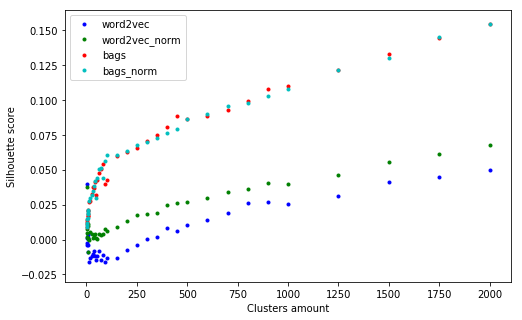

In [2]:
word2vec_results= pd.read_csv('results/word2vec_results.csv')
word2vec_normalized_results= pd.read_csv('results/word2vec_results_normalized.csv')
bags_results= pd.read_csv('results/bags_results.csv')
bags_normalized_results= pd.read_csv('results/bags_results_normalized.csv')

x = word2vec_results['clusters']
y_word2vec = word2vec_results['silhouette_score']
y_word2vec_normalized = word2vec_normalized_results['silhouette_score']
y_bags = bags_results['silhouette_score']
y_bags_normalized = bags_normalized_results['silhouette_score']

plt.figure(figsize=(8,5))

plt.scatter(x,y_word2vec, c='b', marker='.', label='word2vec')
plt.scatter(x, y_word2vec_normalized, c='g', marker='.', label='word2vec_norm')
plt.scatter(x, y_bags, c='r', marker='.', label='bags')
plt.scatter(x, y_bags_normalized, c='c', marker='.', label='bags_norm')
plt.legend(loc='upper left')
plt.xlabel("Clusters amount")
plt.ylabel("Silhouette score")
plt.show()


A closer look at the 0-250 clusters range:

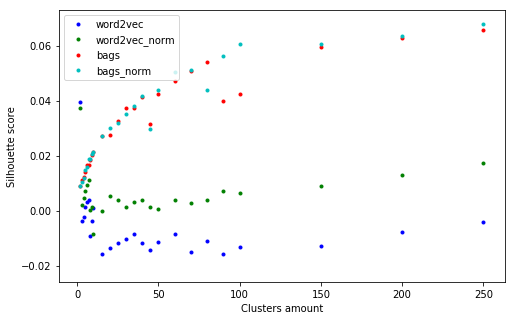

In [4]:
plt.figure(figsize=(8,5))

plt.scatter(x[:25],y_word2vec[:25], c='b', marker='.', label='word2vec')
plt.scatter(x[:25], y_word2vec_normalized[:25], c='g', marker='.', label='word2vec_norm')
plt.scatter(x[:25], y_bags[:25], c='r', marker='.', label='bags')
plt.scatter(x[:25], y_bags_normalized[:25], c='c', marker='.', label='bags_norm')
plt.legend(loc='upper left')
plt.xlabel("Clusters amount")
plt.ylabel("Silhouette score")
plt.show()


Looks like the variation is just an expected oscillation on the results due to cluster initialization.

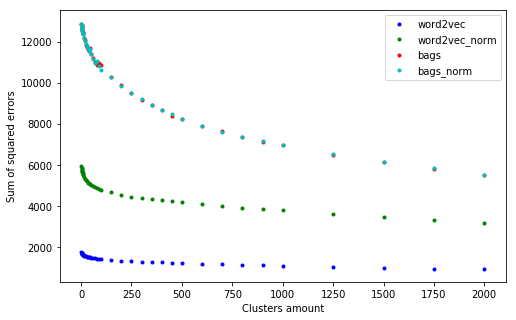

In [9]:
x = word2vec_results['clusters']
y_word2vec = word2vec_results['sse']
y_word2vec_normalized = word2vec_normalized_results['sse']
y_bags = bags_results['sse']
y_bags_normalized = bags_normalized_results['sse']

plt.figure(figsize=(8,5))

plt.scatter(x,y_word2vec, c='b', marker='.', label='word2vec')
plt.scatter(x, y_word2vec_normalized, c='g', marker='.', label='word2vec_norm')
plt.scatter(x, y_bags, c='r', marker='.', label='bags')
plt.scatter(x, y_bags_normalized, c='c', marker='.', label='bags_norm')
plt.legend(loc='upper right')
plt.xlabel("Clusters amount")
plt.ylabel("Sum of squared errors")
plt.show()


A closer look at the elbow:

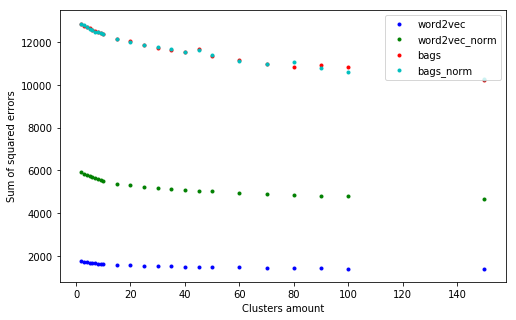

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(x[:23],y_word2vec[:23], c='b', marker='.', label='word2vec')
plt.scatter(x[:23], y_word2vec_normalized[:23], c='g', marker='.', label='word2vec_norm')
plt.scatter(x[:23], y_bags[:23], c='r', marker='.', label='bags')
plt.scatter(x[:23], y_bags_normalized[:23], c='c', marker='.', label='bags_norm')
plt.legend(loc='upper right')
plt.xlabel("Clusters amount")
plt.ylabel("Sum of squared errors")
plt.show()

# Sticking with bags data, seeing results for [500-1000] clusters
Now we will use only the normalized bags data set and 500-1000 clusters.

In [ ]:
kmeans_500 = KMeans(n_clusters=500).fit(bags_health_df_normalized)
labels_500 = kmeans_500.labels_
y_500 = silhouette_score(bags_health_df_normalized, labels_500, metric='euclidean')
print (500, ',', y_500, ',', kmeans_500.inertia_, sep='')

kmeans_600 = KMeans(n_clusters=600).fit(bags_health_df_normalized)
labels_600 = kmeans_600.labels_
y_600 = silhouette_score(bags_health_df_normalized, labels_600, metric='euclidean')
print (600, ',', y_600, ',', kmeans_600.inertia_, sep='')

kmeans_700 = KMeans(n_clusters=700).fit(bags_health_df_normalized)
labels_700 = kmeans_700.labels_
y_700 = silhouette_score(bags_health_df_normalized, labels_700, metric='euclidean')
print (700, ',', y_700, ',', kmeans_700.inertia_, sep='')

kmeans_800 = KMeans(n_clusters=800).fit(bags_health_df_normalized)
labels_800 = kmeans_800.labels_
y_800 = silhouette_score(bags_health_df_normalized, labels_800, metric='euclidean')
print (800, ',', y_800, ',', kmeans_800.inertia_, sep='')

kmeans_900 = KMeans(n_clusters=900).fit(bags_health_df_normalized)
labels_900 = kmeans_900.labels_
y_900 = silhouette_score(bags_health_df_normalized, labels_900, metric='euclidean')
print (900, ',', y_900, ',', kmeans_900.inertia_, sep='')

In [ ]:
kmeans_1000 = KMeans(n_clusters=1000).fit(bags_health_df_normalized)
labels_1000 = kmeans_1000.labels_
y_1000 = silhouette_score(bags_health_df_normalized, labels_1000, metric='euclidean')
print (1000, ',', y_1000, ',', kmeans_1000.inertia_, sep='')

## Qualitative analysis
Now we use the best model of the above to get some cluster tweets

In [ ]:
km = ????

In [ ]:
with open('./health-dataset/health.txt', 'r') as file:
    data = file.readlines()

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data['headline_text']
cluster_map['cluster'] = km.labels_
random_cluster = random.randint(0,999)
print(cluster_map[cluster_map.cluster == random_cluster])


# PCA Dimensionality Reduction
Trying out PCA dimensionality reduction.

In [19]:
print ("components", ',', "silhouette_score", ',', "sse", sep='')

for i in [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]:
    pca = PCA(n_components=i).fit_transform(bags_health_df_normalized)
    kmeans= KMeans(n_clusters=500).fit(pca)
    labels = kmeans.labels_
    y = silhouette_score(pca, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

components,silhouette_score,sse
1,0.553315445244649,0.0005433874796614283
5,0.2074454919522126,1.8902924379500796
10,0.20461686244688013,14.44570749859774
15,0.20494522563896256,35.346890965040565
20,0.22527193199878495,72.06624667878212
25,0.23952327624389194,117.93813940315724
30,0.24602413921294988,164.29967194149623
35,0.25713153502990715,217.32682150632982
40,0.2540065089548759,278.7971580455824
45,0.24527351328674932,345.45381897551295
50,0.24898616174560756,417.83291030554545
55,0.23425539015035446,479.6081975765348
60,0.23231718491099868,537.1370590469644
65,0.22905673156830053,602.112559740855
70,0.22424420742445353,680.2215218671239
75,0.22176125625824594,743.9717695827785
80,0.21572854909728265,810.4042536515201
85,0.20871687805861167,875.5971821575367
90,0.20761984031146863,947.2769294898586
95,0.1985754652702021,1014.9665868103802
100,0.1994399237760596,1072.0545382521707
105,0.1976944251223067,1144.4692255551593
110,0.1897988078033471,1207.4873924686326
115,0.181570650366

In [20]:
for i in [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]:
    pca = PCA(n_components=i).fit_transform(bags_health_df_normalized)
    kmeans= KMeans(n_clusters=600).fit(pca)
    labels = kmeans.labels_
    y = silhouette_score(pca, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

1,0.5572498449264588,0.0003430120811786603
5,0.21004963494010617,1.6259625116600804
10,0.21341523650937796,12.528623614312355
15,0.2094736741288261,31.5775583573181
20,0.228648154996344,62.57411097439292
25,0.24296041813933772,100.21687497215505
30,0.2466490690906952,144.17571082857242
35,0.25023293028056237,192.30093352223867
40,0.2545719102518744,252.0372178195696
45,0.24843656887778776,311.3550367835843
50,0.25216624424264256,370.91408569173
55,0.24361282189117267,431.64737351067373
60,0.23788301812973886,490.1995144666304
65,0.22454495033880378,556.5879904418047
70,0.22428321385800087,622.3488028090472
75,0.22386223147263368,681.0636490863808
80,0.22712606363757712,751.3587493237417
85,0.22474469907212422,815.9877879611913
90,0.20617790679144457,876.0162850017795
95,0.19848857639385395,939.6125889890845
100,0.20557928269899942,1002.3585882469832
105,0.1871648520086993,1062.5220071952251
110,0.1946813132179395,1127.1811357138388
115,0.189424185715946,1188.6522523393382
120,0.1758675

In [21]:
for i in [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]:
    pca = PCA(n_components=i).fit_transform(bags_health_df_normalized)
    kmeans= KMeans(n_clusters=700).fit(pca)
    labels = kmeans.labels_
    y = silhouette_score(pca, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

1,0.5596718221352053,0.0002298162411601897
5,0.2063364246297641,1.447307254292869
10,0.20620132048522632,10.876626714422953
15,0.22217352457748743,25.957323437174697
20,0.24185682435682937,54.8001940911371
25,0.23901846107208158,92.2212229895816
30,0.2463031803897563,131.3789455442082
35,0.2473402929750848,171.03133671977955
40,0.2389739795651973,222.66471235424228
45,0.26316539005190037,280.90585520729275
50,0.24120111316345755,337.18913670828636
55,0.25389574345817234,397.70504834633346
60,0.24357500721000938,450.3953183382956
65,0.23986218041599752,512.9501151124979
70,0.24390207713282094,574.6605793482152
75,0.22993642767031217,635.3504965061836
80,0.22496767720012426,701.0815893193829
85,0.23418767215383454,758.6456362788572
90,0.21727060740552953,818.6916491991076
95,0.21408481050783182,880.0402853244152
100,0.2063229008785378,948.2635722224408
105,0.19562142959663442,998.0470667656516
110,0.19811609269322988,1058.5211211706132
115,0.2015255187131518,1121.0805328351892
120,0.1889

In [ ]:
for i in [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]:
    pca = PCA(n_components=i).fit_transform(bags_health_df_normalized)
    kmeans= KMeans(n_clusters=800).fit(pca)
    labels = kmeans.labels_
    y = silhouette_score(pca, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

1,0.5676193678974986,0.00016218325088748444
5,0.20806364050966514,1.2585008336879897
10,0.20396920407537772,9.487811558061047
15,0.2176025006895539,23.508566842743793
20,0.23123985780943668,47.891752262132435
25,0.23446688519425377,81.3124116637652
30,0.23970827548616674,119.36400473667508
35,0.25359046089796927,153.01459348421932
40,0.2650120598491322,203.05578069918684
45,0.26537336289867025,255.28890359957512
50,0.24703169697165617,308.76092160244826
55,0.23710842927455184,358.440008478724
60,0.24556140592604328,412.9275825488314
65,0.2396076089880498,477.89951749467537
70,0.2383128467417517,533.8060009201153
75,0.2340421314905722,595.3877400644888
80,0.23332024976120794,647.4992524906564
85,0.220042562491978,705.9182502743957
90,0.21691927273644218,767.338753635504
95,0.2138176594275792,830.3329234549396


In [ ]:
for i in [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120]:
    pca = PCA(n_components=i).fit_transform(bags_health_df_normalized)
    kmeans= KMeans(n_clusters=1000).fit(pca)
    labels = kmeans.labels_
    y = silhouette_score(pca, labels, metric='euclidean')
    print (i, ',', y, ',', kmeans.inertia_, sep='')

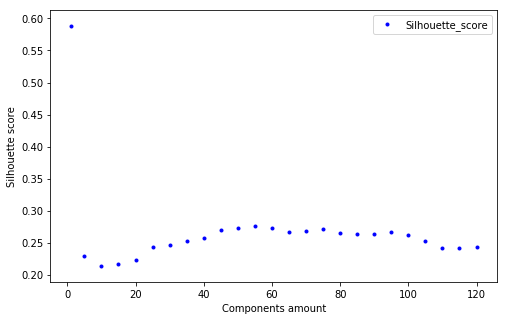

In [47]:
pca_results= pd.read_csv('results/pca_results.csv')
x = pca_results['components']

y_sse = pca_results['sse']
y_silhouette = pca_results['silhouette_score']


plt.figure(figsize=(8,5))

plt.scatter(x, y_silhouette, c='b', marker='.', label='Silhouette_score')
plt.legend(loc='upper right')
plt.xlabel("Components amount")
plt.ylabel("Silhouette score")
plt.show()

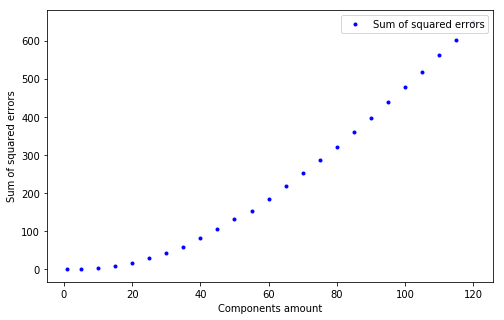

In [46]:
plt.figure(figsize=(8,5))

plt.scatter(x, y_sse, c='b', marker='.', label='Sum of squared errors')
plt.legend(loc='upper right')
plt.xlabel("Components amount")
plt.ylabel("Sum of squared errors")
plt.show()

# Qualitative analysis after PCA
After applying PCA algorithm to our model, we check the tweets from a sample cluster.

In [ ]:
pca = PCA(n_components=1).fit_transform(bags_health_df_normalized)
pca_kmeans_1000= KMeans(n_clusters=1000).fit(pca)
labels = pca_kmeans_1000.labels_

cluster_map = pd.DataFrame()
cluster_map['data_index'] = data['headline_text']
cluster_map['cluster'] = pca_kmeans_1000.labels_
random_cluster = random.randint(0,999)
print(cluster_map[cluster_map.cluster == random_cluster])

In [ ]:
pca = PCA(n_components=5).fit_transform(bags_health_df_normalized)
pca5_kmeans_1000= KMeans(n_clusters=1000).fit(pca)
labels = pca5_kmeans_1000.labels_

cluster_map_5 = pd.DataFrame()
cluster_map_5['data_index'] = data['headline_text']
cluster_map_5['cluster'] = pca5_kmeans_1000.labels_
random_cluster = random.randint(0,999)
print(cluster_map_5[cluster_map_5.cluster == random_cluster])